<div class="alert alert-info"><div class="alert alert-info">
This material is not intended to be relied upon as a forecast, research or investment advice, and is not a recommendation. Past performance is not always indicative of future returns. I may or may not own stocks listed
</div></div>

Now that I got that out of the way

# Synopsis

I am a quant/mechanical investor at heart. I no longer have the time to do quant work or stock picking. Sad to say, I am going the ETF route. Something safe and diverified. I like the concept of not looking at my portfolio and have it just work.

I have had a few choices:

* Vanguard Target Retirement 2030 Fund (VTHRX)
* [Some other Targe Date fund](https://investor.vanguard.com/mutual-funds/target-retirement/#/)
* Some combos of ETFs
* Continue to overthing or stess out buying individual stocks

What is good about the latter is that you can decide your own allocation. Because of my situation, I do not need to be in bonds at all. the rule of 120 or 100 does not apply. My current retirement fund functions as such.

In spite of my age. a 100/0 or 90/10 stock/bond ration is acceptable

For my main profolio, I am going for a 90/10 stock/bond and 60/40 US/International. I would prefer a home bias, but from what I read, going forward, the United States might not be all that. 

Side note: Most US firms are really international/multinational. The benefit of US stocks is the SEC and regulators.

Now for a quick look at the plan.
<!-- TEASER_END -->

The ETFs that I have chose are:
* VTI Vanguard Total Stock Market Index Fund;ETF
* VXUS: Vanguard Total International Stock Index Fund;ETF
* AGG: iShares Core US Aggregate Bond ETF
* BNDX: Vanguard Total International Bond Index Fund;ETF

VTI/VXUS at 60/40 could be reduced to just VT. However, if I choose to change alocation, it is easier.

I am not always a fan of looking at generated charts by others (I like to see how they produced their results). So here are a few that can be reproduced.


In [1]:
#Load Libraries
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(tidyquant))


#Stocks an Weights
ETF <- c('VTI','VXUS','AGG','BNDX')
wt <- c(.54,.36,.07,.03)

#set periods
start_date <- today() - years(10)
end_date <- today()
start_date
end_date

[1] "2011-12-08"

[1] "2021-12-08"

# Get the prices

In [2]:
suppressWarnings(stock_returns_monthly  <- ETF %>%
    tq_get(get  = "stock.prices",
           from = start_date,
           to   = end_date) %>%
    group_by(symbol) %>%
    tq_transmute(select     = adjusted, 
                 mutate_fun = periodReturn, 
                 period     = "monthly", 
                 col_rename = "Ra"))
#stock_returns_monthly

## Get Baseline data

S&P500 is the benchmark that most try to beat

In [3]:
suppressWarnings(baseline_returns_monthly <- "VOO" %>%
  tq_get(get  = "stock.prices",
         from = start_date,
         to   = end_date) %>%
  tq_transmute(select     = adjusted, 
               mutate_fun = periodReturn, 
               period     = "monthly", 
               col_rename = "Rb"))

Change data to monthly returns

In [4]:
suppressWarnings(portfolio_returns_monthly <- stock_returns_monthly %>%
  tq_portfolio(assets_col  = symbol, 
               returns_col = Ra, 
               weights     = wt,
               rebalance_on = "years",
               col_rename  = "Ra"))

RaRb_single_portfolio <- left_join(portfolio_returns_monthly, 
                                   baseline_returns_monthly,
                                   by = "date")

# Perfomance Data

## Returns

In [5]:
RaRb_single_portfolio %>%
  tq_performance(Ra = Ra, Rb = NULL, performance_fun = table.AnnualizedReturns)

AnnualizedReturn AnnualizedSharpe(Rf=0%) AnnualizedStdDev
1 0.1185           0.9998                  0.1185

In [6]:
RaRb_single_portfolio %>%
  tq_performance(Ra = Ra, Rb = Rb, performance_fun = table.CAPM)

ActivePremium Alpha   AnnualizedAlpha Beta   Beta-  Beta+  Correlation
1 -0.0448       -0.0019 -0.0223         0.8846 0.9122 0.8332 0.969      
  Correlationp-value InformationRatio R-squared TrackingError TreynorRatio
1 0                  -1.3611          0.9389    0.0329        0.134

This is a good question here. If there is a negative 4% to the S&P500 and is almost completely corrilated? Why not just stick with either SPY or VOO? From what I understand and read, Global is expanding in percentage of the market. It is what [VANGARD](https://20somethingfinance.com/vanguard-increases-international-equity-allocation/) is thinking. 

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"
Warning message:
"`type_convert()` only converts columns of type 'character'.
- `df` has no columns of type 'character'"
`geom_smooth()` using formula 'y ~ x'



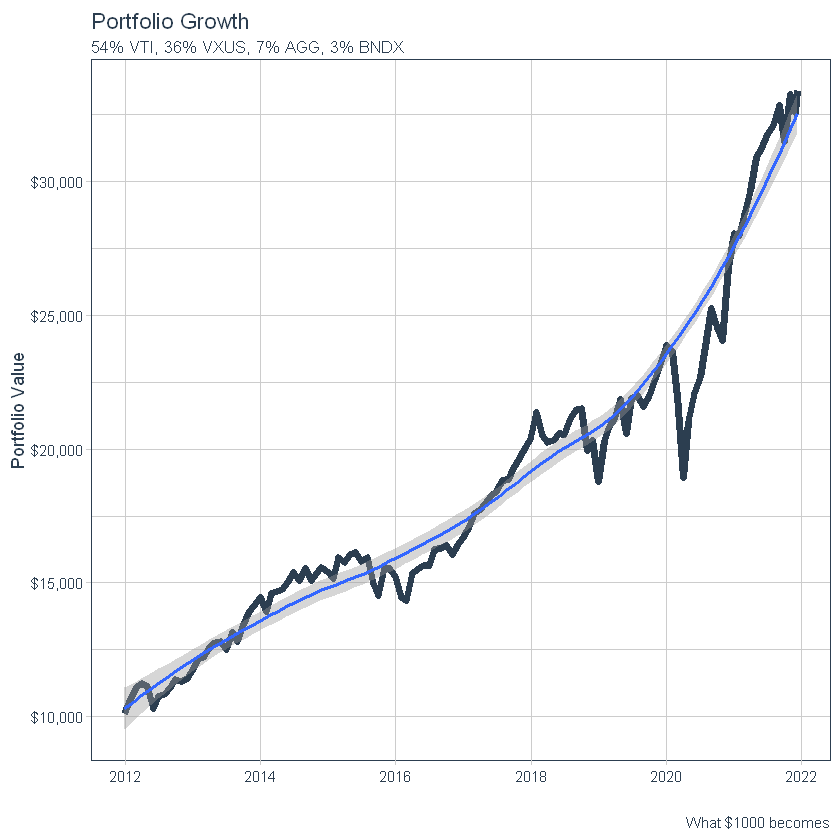

In [7]:
portfolio_growth_monthly <- stock_returns_monthly %>%
    tq_portfolio(assets_col   = symbol, 
                 returns_col  = Ra, 
                 weights      = wt, 
                 col_rename   = "investment.growth",
                 wealth.index = TRUE) %>%
    mutate(investment.growth = investment.growth * 10000)

portfolio_growth_monthly %>%
    ggplot(aes(x = date, y = investment.growth)) +
    geom_line(size = 2, color = palette_light()[[1]]) +
    labs(title = "Portfolio Growth",
         subtitle = "54% VTI, 36% VXUS, 7% AGG, 3% BNDX",
         caption = "What $1000 becomes",
         x = "", y = "Portfolio Value") +
    geom_smooth(method = "loess") +
    theme_tq() +
    scale_color_tq() +
    scale_y_continuous(labels = scales::dollar)

ETF <- c('VTI','VXUS','AGG','BNDX')
wt <- c(.54,.36,.07,.03)

How your money grows

In [8]:
portfolio_growth_monthly

date       investment.growth
1   2011-12-30 10115.19         
2   2012-01-31 10663.84         
3   2012-02-29 11084.03         
4   2012-03-30 11242.82         
5   2012-04-30 11125.93         
6   2012-05-31 10322.65         
7   2012-06-29 10766.46         
8   2012-07-31 10840.44         
9   2012-08-31 11101.59         
10  2012-09-28 11389.60         
11  2012-10-31 11306.04         
12  2012-11-30 11439.11         
13  2012-12-31 11718.38         
14  2013-01-31 12163.76         
15  2013-02-28 12204.69         
16  2013-03-28 12516.14         
17  2013-04-30 12790.51         
18  2013-05-31 12802.93         
19  2013-06-28 12522.74         
20  2013-07-31 13139.56         
21  2013-08-30 12813.32         
22  2013-09-30 13439.86         
23  2013-10-31 13951.27         
24  2013-11-29 14175.02         
25  2013-12-31 14470.48         
26  2014-01-31 13949.92         
27  2014-02-28 14616.35         
28  2014-03-31 14684.61         
29  2014-04-30 14760.02         
30  2014-05-30 15050.72         
... ...        ...              
92  2019-07-31 21999.10         
93  2019-08-30 21594.43         
94  2019-09-30 22001.25         
95  2019-10-31 22512.98         
96  2019-11-29 23150.16         
97  2019-12-31 23855.85         
98  2020-01-31 23659.91         
99  2020-02-28 21972.23         
100 2020-03-31 18953.83         
101 2020-04-30 21035.61         
102 2020-05-29 22087.58         
103 2020-06-30 22676.30         
104 2020-07-31 23829.87         
105 2020-08-31 25261.79         
106 2020-09-30 24521.19         
107 2020-10-30 24044.76         
108 2020-11-30 26784.32         
109 2020-12-31 28051.81         
110 2021-01-29 27993.20         
111 2021-02-26 28751.10         
112 2021-03-31 29615.31         
113 2021-04-30 30883.90         
114 2021-05-28 31214.09         
115 2021-06-30 31750.76         
116 2021-07-30 32077.91         
117 2021-08-31 32847.87         
118 2021-09-30 31504.75         
119 2021-10-29 33240.36         
120 2021-11-30 32569.42         
121 2021-12-07 33376.09

Need to stop now. If I get a chance, I will update this page later.